<a href="https://colab.research.google.com/github/candrayu/Tugas-Keamanan-Data/blob/main/Book_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Library**

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import missingno as msno

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import iplot

from PIL import Image
import requests

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

import warnings
warnings.filterwarnings('ignore')

# **Load Dataset**

In [ ]:
# Dataset Buku
dakot_books = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Semester 7/Sains Data Industri/Dataset/BX_Books.csv',
                          encoding='latin-1')

# Dataset Rating Buku
dakot_book_ratings = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Semester 7/Sains Data Industri/Dataset/BX-Book-Ratings.csv',
                                encoding='latin-1')

# Dataset User
dakot_users = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Semester 7/Sains Data Industri/Dataset/BX-Users.csv',
                        encoding='latin-1')

# **Cleaning Dataset**

In [ ]:
print("Books Shape: " ,dakot_books.shape )
print("Ratings Shape: " ,dakot_book_ratings.shape )
print("Users Shape: " ,dakot_users.shape )

Books Shape:  (271379, 22)
Ratings Shape:  (1048575, 3)
Users Shape:  (278858, 3)


In [ ]:
def print_nunique_vals(df, ds_name = 'df'):
    print(f"Number of unique values in each column in the {ds_name} dataset:")
    print(df.nunique())

In [ ]:
print_nunique_vals(dakot_books[['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher']], 'Books')
print('=' * 85)
print_nunique_vals(dakot_book_ratings, 'Ratings')
print('=' * 85)
print_nunique_vals(dakot_users, 'Users')

Number of unique values in each column in the Books dataset:
ISBN                   271378
Book-Title             238492
Book-Author             92855
Year-Of-Publication       188
Publisher               15352
dtype: int64
Number of unique values in each column in the Ratings dataset:
User-ID         95513
ISBN           322472
Book-Rating        11
dtype: int64
Number of unique values in each column in the Users dataset:
User-ID     278858
Location     57339
Age            165
dtype: int64


## **Books Dataset**

In [ ]:
dakot_books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Unnamed: 8,Unnamed: 9,...,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
0,195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,60973129,Decision in Normandy,Carlo D'Este,1991.0,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,393045218,The Mummies of Urumchi,E. J. W. Barber,1999.0,W. W. Norton & Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dakot_books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271379 entries, 0 to 271378
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271379 non-null  object
 1   Book-Title           271378 non-null  object
 2   Book-Author          233746 non-null  object
 3   Year-Of-Publication  232406 non-null  object
 4   Publisher            232404 non-null  object
 5   Image-URL-S          228144 non-null  object
 6   Image-URL-M          228144 non-null  object
 7   Image-URL-L          228144 non-null  object
 8   Unnamed: 8           1 non-null       object
 9   Unnamed: 9           31 non-null      object
 10  Unnamed: 10          19 non-null      object
 11  Unnamed: 11          11 non-null      object
 12  Unnamed: 12          6 non-null       object
 13  Unnamed: 13          4 non-null       object
 14  Unnamed: 14          3 non-null       object
 15  Unnamed: 15          2 non-null   

In [ ]:
dakot_books[['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher']].describe()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
count,271379,271378,233746,232406.0,232404
unique,271378,238492,92855,188.0,15352
top,486404242,Love,Agatha Christie,1999.0,Pocket
freq,2,74,618,13041.0,3688


### **Buang Kolom Tidak Digunakan**

In [ ]:
dakot_books_filtered = dakot_books[['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher']]
dakot_books_filtered.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press
1,2005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada
2,60973129,Decision in Normandy,Carlo D'Este,1991.0,HarperPerennial
3,374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux
4,393045218,The Mummies of Urumchi,E. J. W. Barber,1999.0,W. W. Norton & Company


### **Merubah Nama Kolom**

In [ ]:
dakot_books_filtered = dakot_books_filtered.rename(columns={'Book-Title': 'title', 'Book-Author': 'author', 'Year-Of-Publication': 'year', 'Publisher': 'publisher'})
dakot_books_filtered.head()

,ISBN,title,author,year,publisher
0,195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press
1,2005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada
2,60973129,Decision in Normandy,Carlo D'Este,1991.0,HarperPerennial
3,374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux
4,393045218,The Mummies of Urumchi,E. J. W. Barber,1999.0,W. W. Norton & Company


### **Merubah Tipe Data Kolom "year" Menjadi Integer**

In [ ]:
dakot_books_filtered['year'] = pd.to_numeric(dakot_books_filtered['year'], errors='coerce').astype('Int64')
dakot_books_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271379 entries, 0 to 271378
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   ISBN       271379 non-null  object
 1   title      271378 non-null  object
 2   author     233746 non-null  object
 3   year       232405 non-null  Int64 
 4   publisher  232404 non-null  object
dtypes: Int64(1), object(4)
memory usage: 10.6+ MB


### **Cek NaN Values**

In [ ]:
dakot_books_filtered.isnull().sum()

,0
ISBN,0
title,1
author,37633
year,38974
publisher,38975


In [ ]:
# prompt: Ingin melihat nilai nan yang ada pada kolom title

# Check for NaN values in the 'title' column
nan_titles = dakot_books_filtered[dakot_books_filtered['title'].isnull()]

# Print the rows with NaN values in the 'title' column
nan_titles

,ISBN,title,author,year,publisher
111813,486404242,NaN,War in Kind: And Other Poems (Dover Thrift Edi...,<NA>,1998


## **Book Ratings Dataset**

In [ ]:
dakot_book_ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0.0
1,276726,155061224,5.0
2,276727,446520802,0.0
3,276729,052165615X,3.0
4,276729,521795028,6.0


In [ ]:
dakot_book_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   User-ID      1048575 non-null  int64  
 1   ISBN         1048574 non-null  object 
 2   Book-Rating  1048570 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 24.0+ MB


In [ ]:
ratings = dakot_book_ratings['User-ID'].value_counts()
ratings.sort_values(ascending=False).head()

,count
User-ID,
11676,13602
198711,7550
153662,6109
98391,5891
35859,5850


In [ ]:
ratings = dakot_book_ratings['ISBN'].value_counts()
ratings.sort_values(ascending=False).head()

,count
ISBN,
971880107,2264
316666343,1164
385504209,813
312195516,668
60928336,662


In [ ]:
dakot_book_ratings.isnull().sum()

,0
User-ID,0
ISBN,1
Book-Rating,5


## **Users Dataset**

In [ ]:
dakot_users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [ ]:
dakot_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [ ]:
dakot_users['Age'] = pd.to_numeric(dakot_users['Age'], errors='coerce')
dakot_users['Age'] = dakot_users['Age'].astype('Int64')
dakot_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   User-ID   278858 non-null  int64 
 1   Location  278858 non-null  object
 2   Age       168096 non-null  Int64 
dtypes: Int64(1), int64(1), object(1)
memory usage: 6.6+ MB


In [ ]:
dakot_users.isnull().sum()

,0
User-ID,0
Location,0
Age,110762


# **Exploratory Data Anlaysis**

## **Cek Tahun Terbit Buku**

In [ ]:
num_books_after_2024 = len(dakot_books_filtered[dakot_books_filtered['year'] > 2024])

print(f"Jumlah buku yang tahunnya di atas 2024: {num_books_after_2024}")

Jumlah buku yang tahunnya di atas 2024: 11


In [ ]:
books_after_2024 = dakot_books_filtered[dakot_books_filtered['year'] > 2024]
books_after_2024

,ISBN,title,author,year,publisher
37488,671746103,MY TEACHER FRIED MY BRAINS (RACK SIZE) (MY TEA...,Coville,2030,Aladdin
55679,671791990,MY TEACHER FLUNKED THE PLANET (RACK SIZE) (MY ...,Bruce Coville,2030,Aladdin
78171,870449842,Crossing America,National Geographic Society,2030,National Geographic
80267,140301690,Alice's Adventures in Wonderland and Through t...,Lewis Carroll,2050,Puffin Books
97830,140201092,Outline of European Architecture (Pelican S.),Nikolaus Pevsner,2050,Penguin USA
116058,394701658,Three Plays of Eugene Oneill,Eugene O'Neill,2038,Vintage Books USA
118299,3442436893,Das groÃ?Â?e BÃ?Â¶se- MÃ?Â¤dchen- Lesebuch.,Kathy Lette,2026,Goldmann
228187,671266500,FOREST PEOPLE (Touchstone Books (Hardcover)),Colin M. Turnbull,2030,Simon & Schuster
240184,684718022,In Our Time: Stories (Scribner Classic),Ernest Hemingway,2030,Collier Books
255426,068471809X,To Have and Have Not,Ernest Hemingway,2037,Simon & Schuster


## **Distribusi Tahun Terbit Buku**

In [ ]:
min_year = dakot_books_filtered['year'].min()
if min_year == 0:
    min_year = dakot_books_filtered[dakot_books_filtered['year'] != 0]['year'].min()

filtered_df = dakot_books_filtered[(dakot_books_filtered['year'] >= min_year) & (dakot_books_filtered['year'] <= 2024)]

fig = px.histogram(filtered_df, x="year", title='Dsitribusi Publikasi Buku per Tahun Sampai Dengan Tahun 2024')

fig.update_layout(
    xaxis_title='Tahun Publikasi',
    yaxis_title='Total Buku',
    xaxis=dict(
        tickmode='linear',
        tick0=min_year,
        dtick=10
    )
)

fig.show()

In [ ]:
filtered_df = dakot_books_filtered[(dakot_books_filtered['year'] >= 1975) & (dakot_books_filtered['year'] <= 2004)]

fig = px.histogram(filtered_df, x="year", title='Distribusi Publikasi Buku per Tahun (1975-2004)')

fig.update_layout(
    xaxis_title='Tahun Publikasi',
    yaxis_title='Total Buku',
    xaxis=dict(
        tickmode='linear',
        dtick=5
    )
)

fig.show()

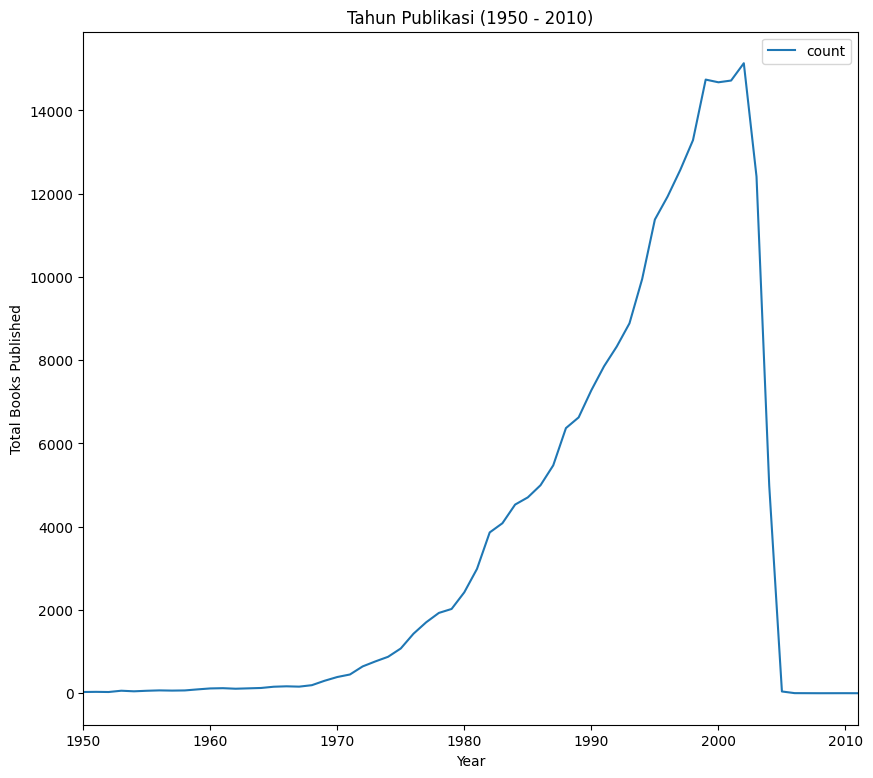

In [ ]:
year_count=dakot_books_filtered['year'].value_counts()
year_count=pd.DataFrame(year_count)

plt.figure(figsize=(10, 9))
sns.lineplot(data=year_count)
plt.title('Tahun Publikasi (1950 - 2010)')
plt.xlim(1950, 2011)
plt.xlabel('Year')
plt.ylabel('Total Books Published')
plt.show()

## **Author Dengan Publish Buku Tertinggi**

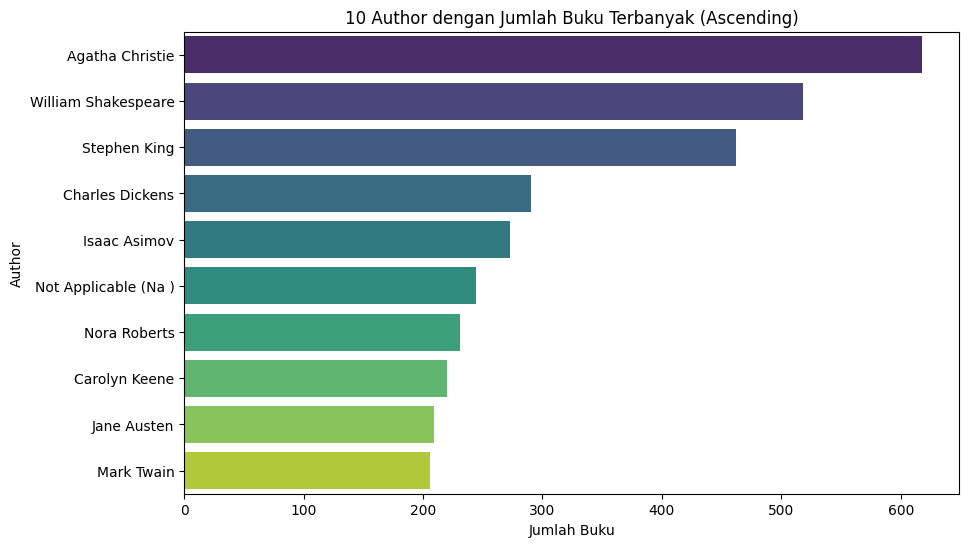

In [ ]:
author_counts = dakot_books_filtered['author'].value_counts().reset_index()
author_counts.columns = ['author', 'book_count']
author_counts = author_counts.sort_values(by='book_count', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='book_count', y='author', data=author_counts, palette='viridis')
plt.title('10 Author dengan Jumlah Buku Terbanyak (Ascending)')
plt.xlabel('Jumlah Buku')
plt.ylabel('Author')
plt.show()

## **Publisher Tertinggi Berdasarkan Buku Terpublish**

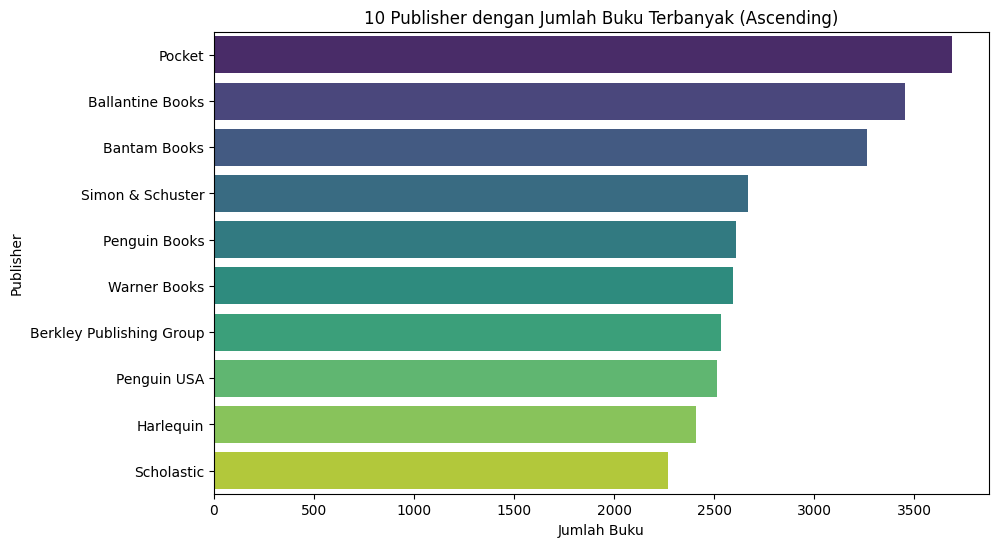

In [ ]:
publisher_counts = dakot_books_filtered['publisher'].value_counts().reset_index()
publisher_counts.columns = ['publisher', 'book_count']
publisher_counts = publisher_counts.sort_values(by='book_count', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='book_count', y='publisher', data=publisher_counts, palette='viridis')
plt.title('10 Publisher dengan Jumlah Buku Terbanyak (Ascending)')
plt.xlabel('Jumlah Buku')
plt.ylabel('Publisher')
plt.show()

## **Melihat Distribusi User Berdasarkan Negara**

In [ ]:
countries = []
cond = dakot_users['Location'].str.split(',')

for cont in cond:

    countries.append(cont[-1])

In [ ]:
dakot_users['Country'] = countries
dakot_users.head()

,User-ID,Location,Age,Country
0,1,"nyc, new york, usa",<NA>,usa
1,2,"stockton, california, usa",18,usa
2,3,"moscow, yukon territory, russia",<NA>,russia
3,4,"porto, v.n.gaia, portugal",17,portugal
4,5,"farnborough, hants, united kingdom",<NA>,united kingdom


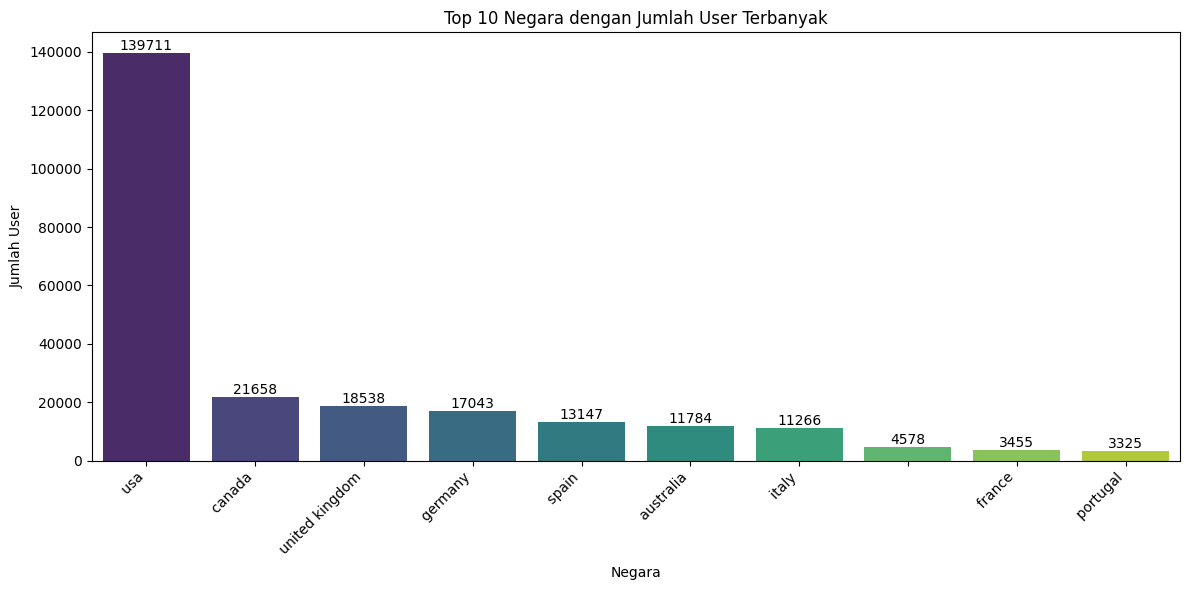

In [ ]:
top_10_countries = dakot_users['Country'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_countries.index, y=top_10_countries.values, palette='viridis')
plt.title('Top 10 Negara dengan Jumlah User Terbanyak')
plt.xlabel('Negara')
plt.ylabel('Jumlah User')
plt.xticks(rotation=45, ha='right')

for i, v in enumerate(top_10_countries.values):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()

## **Distribusi Rating Semua Buku**

In [ ]:
books_with_ratings = pd.merge(dakot_books_filtered, dakot_book_ratings, on='ISBN')
books_with_ratings.head()

,ISBN,title,author,year,publisher,User-ID,Book-Rating
0,195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,2,0.0
1,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8,5.0
2,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,11400,0.0
3,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,11676,8.0
4,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,41385,0.0


In [ ]:
print("Total Data di Merge:", len(books_with_ratings))

Total Data di Merge: 941159


In [ ]:
rating_counts = books_with_ratings['Book-Rating'].value_counts()
fig_bar = px.bar(
    x=rating_counts.index.astype(str),  # Pastikan index diubah ke string
    y=rating_counts.values,
    labels={'x': 'Rating', 'y': 'Number of Ratings'},
    title='Distribusi Rating Buku',
    text=rating_counts.values
)

fig_bar.update_traces(textposition='outside')

fig_bar.update_layout(
    xaxis={'categoryorder': 'total descending'}
)

fig_bar.show()

rating_percentages = books_with_ratings['Book-Rating'].value_counts(normalize=True) * 100
fig_pie = px.pie(rating_percentages,
                 values=rating_percentages.values,
                 names=rating_percentages.index,
                 title='Distribusi Rating Buku (%)')
fig_pie.show()

## **TOP 10 Author Berdasarkan Rata-rata Rating Dari Seluruh Buku**

In [ ]:
books_with_ratings.head()

,ISBN,title,author,year,publisher,User-ID,Book-Rating
0,195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,2,0.0
1,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8,5.0
2,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,11400,0.0
3,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,11676,8.0
4,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,41385,0.0


In [ ]:
authors_top10 = books_with_ratings['author'].value_counts().head(10)
authors_top10 = list(authors_top10.index)
authors_top10

['Stephen King',
 'Nora Roberts',
 'John Grisham',
 'James Patterson',
 'Mary Higgins Clark',
 'Dean R. Koontz',
 'Danielle Steel',
 'Tom Clancy',
 'Sue Grafton',
 'Janet Evanovich']

In [ ]:
books_with_ratings.isnull().sum()

,0
ISBN,0
title,11
author,104193
year,106552
publisher,106543
User-ID,0
Book-Rating,0


In [ ]:
books_with_ratings.dropna(inplace=True)

In [ ]:
top10_authors = pd.DataFrame(columns = books_with_ratings.columns)

for author in authors_top10:

    cond_df = books_with_ratings[books_with_ratings['author'] == author]

    top10_authors =  pd.concat([top10_authors, cond_df], axis=0)

In [ ]:
top10_authors.shape

(46958, 7)

In [ ]:
top10_authors = top10_authors[top10_authors['Book-Rating'] != 0]

In [ ]:
top10_authors.shape

(18042, 7)

In [ ]:
top10_authors = top10_authors.groupby('author')['Book-Rating'].agg('mean').reset_index().sort_values(by='Book-Rating', ascending=False)
top10_authors.head()

,author,Book-Rating
3,Janet Evanovich,7.914411
7,Stephen King,7.765140
8,Sue Grafton,7.731641
2,James Patterson,7.709871
6,Nora Roberts,7.677100


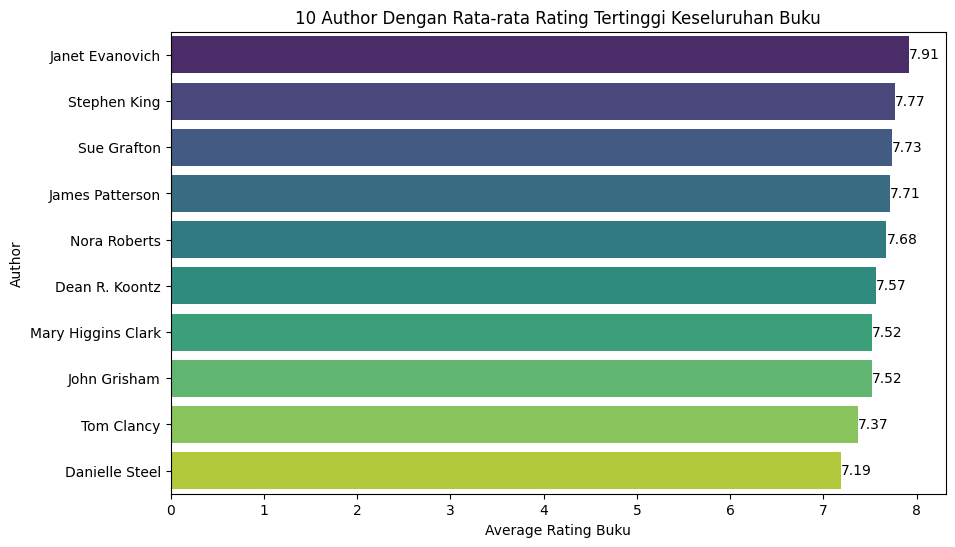

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Book-Rating', y='author', data=top10_authors, palette='viridis')

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge')

plt.title('10 Author Dengan Rata-rata Rating Tertinggi Keseluruhan Buku')
plt.xlabel('Average Rating Buku')
plt.ylabel('Author')
plt.show()

## **TOP 10 Publisher Berdasarkan Rata-rata Rating Dari Seluruh Buku**

In [ ]:
books_with_ratings.head()

,ISBN,title,author,year,publisher,User-ID,Book-Rating
0,195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,2,0.0
1,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8,5.0
2,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,11400,0.0
3,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,11676,8.0
4,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,41385,0.0


In [ ]:
publisher_top10 = books_with_ratings['publisher'].value_counts().head(10)
publisher_top10 = list(publisher_top10.index)
publisher_top10

['Ballantine Books',
 'Pocket',
 'Berkley Publishing Group',
 'Warner Books',
 'Bantam Books',
 'Signet Book',
 'Bantam',
 'Avon',
 'Penguin Books',
 'Jove Books']

In [ ]:
publishers_top10 = books_with_ratings['publisher'].value_counts().head(10)
publishers_top10 = list(publishers_top10.index)

In [ ]:
top10_publishers = pd.DataFrame(columns = books_with_ratings.columns)

for pub in publishers_top10:

    cond_df = books_with_ratings[books_with_ratings['publisher'] == pub]

    top10_publishers =  pd.concat([top10_publishers, cond_df], axis=0)

In [ ]:
top10_publishers = top10_publishers[top10_publishers['Book-Rating'] != 0]

In [ ]:
top10_publishers = top10_publishers.groupby('publisher')['Book-Rating'].agg('mean').reset_index().sort_values(by='Book-Rating', ascending=False)

In [ ]:
top10_publishers

,publisher,Book-Rating
2,Bantam,7.818841
6,Penguin Books,7.777246
0,Avon,7.631742
1,Ballantine Books,7.592538
8,Signet Book,7.585867
7,Pocket,7.569781
9,Warner Books,7.537157
5,Jove Books,7.531669
3,Bantam Books,7.530835
4,Berkley Publishing Group,7.457731


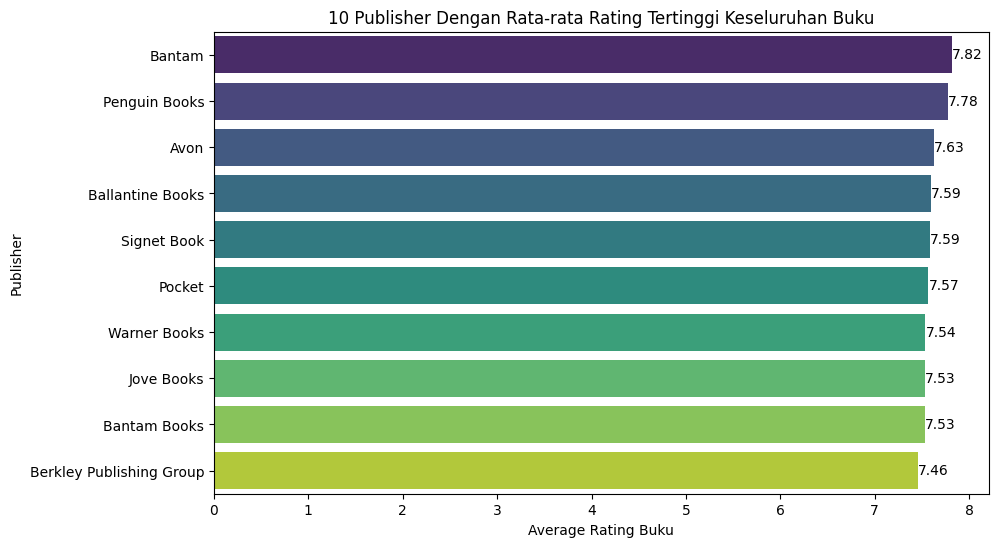

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Book-Rating', y='publisher', data=top10_publishers, palette='viridis')

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge')

plt.title('10 Publisher Dengan Rata-rata Rating Tertinggi Keseluruhan Buku')
plt.xlabel('Average Rating Buku')
plt.ylabel('Publisher')
plt.show()

## **TOP 10 Buku Dengan Rata-rata Rating Tertinggi**

In [ ]:
books_top10 = books_with_ratings['title'].value_counts().head(10)
books_top10 = list(books_top10.index)
books_top10

['Wild Animus',
 'The Lovely Bones: A Novel',
 'The Da Vinci Code',
 'A Painted House',
 'The Nanny Diaries: A Novel',
 "Bridget Jones's Diary",
 'The Secret Life of Bees',
 'Divine Secrets of the Ya-Ya Sisterhood: A Novel',
 'The Red Tent (Bestselling Backlist)',
 'Angels & Demons']

In [ ]:
top10_books = pd.DataFrame(columns = books_with_ratings.columns)

for book in books_top10:

    cond_df = books_with_ratings[books_with_ratings['title'] == book]

    top10_books =  pd.concat([top10_books, cond_df], axis=0)

In [ ]:
top10_books = top10_books[top10_books['Book-Rating'] != 0]

In [ ]:
top10_books.shape

(3969, 7)

In [ ]:
top10_books = top10_books.groupby('title')['Book-Rating'].agg('mean').reset_index().sort_values(by='Book-Rating', ascending=False)

In [ ]:
top10_books.head(10)
top10_books

,title,Book-Rating
8,The Secret Life of Bees,8.511936
4,The Da Vinci Code,8.442266
5,The Lovely Bones: A Novel,8.170079
7,The Red Tent (Bestselling Backlist),8.163842
1,Angels & Demons,7.993151
3,Divine Secrets of the Ya-Ya Sisterhood: A Novel,7.837288
2,Bridget Jones's Diary,7.614035
6,The Nanny Diaries: A Novel,7.397183
0,A Painted House,7.338323
9,Wild Animus,4.442966


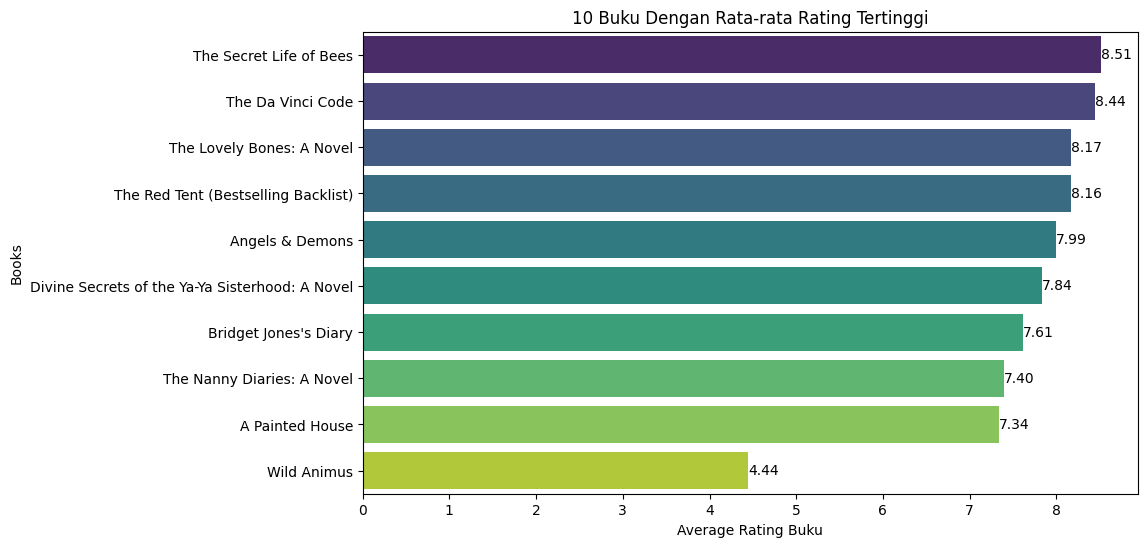

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Book-Rating', y='title', data=top10_books, palette='viridis')

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge')

plt.title('10 Buku Dengan Rata-rata Rating Tertinggi')
plt.xlabel('Average Rating Buku')
plt.ylabel('Books')
plt.show()

## **TOP 10 Buku Terpopuler by Rating**

In [ ]:
def prGreen(skk): print("\033[92m {}\033[00m" .format(skk))
def prRed(skk): print("\033[91m {}\033[00m" .format(skk))
def prYellow(skk): print("\033[93m {}\033[00m" .format(skk))

In [ ]:
def popular_books():

    for (book, ratings) in zip(top10_books['title'], top10_books['Book-Rating']):
        prGreen(book)
        print("Rating",end=' =>')
        prRed(round(ratings,1))
        print("-"*50)

popular_books()

 The Secret Life of Bees
Rating => 8.5
--------------------------------------------------
 The Da Vinci Code
Rating => 8.4
--------------------------------------------------
 The Lovely Bones: A Novel
Rating => 8.2
--------------------------------------------------
 The Red Tent (Bestselling Backlist)
Rating => 8.2
--------------------------------------------------
 Angels & Demons
Rating => 8.0
--------------------------------------------------
 Divine Secrets of the Ya-Ya Sisterhood: A Novel
Rating => 7.8
--------------------------------------------------
 Bridget Jones's Diary
Rating => 7.6
--------------------------------------------------
 The Nanny Diaries: A Novel
Rating => 7.4
--------------------------------------------------
 A Painted House
Rating => 7.3
--------------------------------------------------
 Wild Animus
Rating => 4.4
--------------------------------------------------


# **Item Based Collaborative Filtering**

## **System Recommendation**

### **Menghitiung Jumlah Buku Yang di Rating**

In [ ]:
count_rate = pd.DataFrame(books_with_ratings['title'].value_counts())
count_rate.head()

,count
title,
Wild Animus,2264
The Lovely Bones: A Novel,1164
The Da Vinci Code,828
A Painted House,766
The Nanny Diaries: A Novel,759


### **Menghitung Rare Buku Yang Jarang di Rating**

In [ ]:
rare_books=count_rate[count_rate["count"]<=100].index
rare_books[:5]

Index(['Soul Harvest: The World Takes Sides (Left Behind No. 4)', 'Space',
       'To the Lighthouse', 'About a Boy (Movie Tie-In)', 'Einstein's Dreams'],
      dtype='object', name='title')

In [ ]:
len(rare_books)

193662

### **Cek Apakah Ada Buku-buku Rare Tersebut Ada di List**

In [ ]:
common_books=books_with_ratings[~books_with_ratings["title"].isin(rare_books)]
common_books.head()

,ISBN,title,author,year,publisher,User-ID,Book-Rating
29,399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,8,0.0
30,399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,11676,9.0
31,399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,29526,9.0
32,399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,36836,0.0
33,399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,46398,9.0


In [ ]:
item_based_cb = common_books.pivot_table(index=["User-ID"],columns=["title"],values="Book-Rating")

In [ ]:
book_title = 'Me Talk Pretty One Day'
sim = item_based_cb[book_title]
recommendation_df=pd.DataFrame(item_based_cb.corrwith(sim).sort_values(ascending=False)).reset_index(drop=False)
recommendation_df

,title,0
0,Daddy,1.0
1,The Woman Next Door,1.0
2,The Reef,1.0
3,Me Talk Pretty One Day,1.0
4,Engaging The Enemy,1.0
...,...,...
754,Rose Madder,NaN
755,Sleepers,NaN
756,Tears of the Moon (Irish Trilogy),NaN
757,The Bourne Supremacy,NaN


In [ ]:
if not recommendation_df['title'][recommendation_df['title'] == book_title].empty:
    recommendation_df=recommendation_df.drop(recommendation_df[recommendation_df["title"]==book_title].index[0])

In [ ]:
less_rating=[]
for i in recommendation_df["title"]:
    if books_with_ratings[books_with_ratings["title"]==i]["Book-Rating"].mean() < 5:
        less_rating.append(i)

less_rating

['Daddy',
 'The Woman Next Door',
 'The Reef',
 'Engaging The Enemy',
 'Absolute Power',
 'Good Harbor: A Novel',
 'The Lake House',
 'The Copper Beech',
 'The Ghost',
 'Cry Wolf',
 'My Gal Sunday',
 'The Survivors Club',
 'Call of the Wild',
 'Kaleidoscope',
 'Table For Two',
 'The Guardian',
 "The Deep End of the Ocean (Oprah's Book Club (Hardcover))",
 'Total Control',
 'Remember Me',
 'The Regulators',
 'Key of Light (Key Trilogy (Paperback))',
 'Nights in Rodanthe',
 'Sea Swept (Quinn Brothers (Paperback))',
 'That Camden Summer',
 'Stillwatch',
 'Dark Rivers of the Heart',
 'A Day Late and a Dollar Short',
 'Hearts In Atlantis',
 'Invasion',
 'Prey',
 'The Kiss',
 'Journey',
 'Wuthering Heights',
 "He Sees You When You're Sleeping : A Novel",
 "I'll Be Seeing You",
 'Beloved (Plume Contemporary Fiction)',
 'Midnight',
 'Last Man Standing',
 'Bridget Jones : The Edge of Reason',
 'Sacred Sins',
 'The World According to Garp',
 'Lake Wobegon Days',
 'Tis: A Memoir',
 'Deadly Decisi

In [ ]:
if recommendation_df.shape[0] - len(less_rating) > 5:

    recommendation_df=recommendation_df[~recommendation_df["title"].isin(less_rating)]
    recommendation_df.columns=["title","Correlation"]


for (candidate_book, corr) in zip(recommendation_df['title'], recommendation_df['Correlation']):
    corr_thershold = 0.7
    if corr > corr_thershold:
        ratings = books_with_ratings[books_with_ratings['title'] == candidate_book]['Book-Rating'].mean()
        prGreen(candidate_book)
        print("Rating ", end = ' =>')
        prRed(round(ratings,1))
        print("-"*50)
    else:
        break

 Ishmael: An Adventure of the Mind and Spirit
Rating  => 5.1
--------------------------------------------------


In [ ]:
def item_based_coll_rs(book_title):

    book_title = str(book_title).strip().lower()  # Convert to lowercase and strip spaces

    # Convert titles in DataFrame to lowercase for case-insensitive comparison
    books_with_ratings['title'] = books_with_ratings['title'].str.strip().str.lower()

    if book_title in books_with_ratings['title'].values:

        count_rate = pd.DataFrame(books_with_ratings['title'].value_counts())
        # The column containing the counts is named 'count', not 'title'
        rare_books=count_rate[count_rate["count"]<=100].index # Changed 'title' to 'count'

        common_books=books_with_ratings[~books_with_ratings["title"].isin(rare_books)]

        if book_title in rare_books:
            prYellow("A rare book, so u may try our popular books: \n ")
            popular_books()

        else:

            item_based_cb = common_books.pivot_table(index=["User-ID"],columns=["title"],values="Book-Rating")
            sim = item_based_cb[book_title]
            recommendation_df=pd.DataFrame(item_based_cb.corrwith(sim).sort_values(ascending=False)).reset_index(drop=False)

            if not recommendation_df['title'][recommendation_df['title'] == book_title].empty:
                recommendation_df=recommendation_df.drop(recommendation_df[recommendation_df["title"]==book_title].index[0])

            less_rating=[]
            for i in recommendation_df["title"]:
                if books_with_ratings[books_with_ratings["title"]==i]["Book-Rating"].mean() < 5:
                    less_rating.append(i)

            if recommendation_df.shape[0] - len(less_rating) > 5:

                recommendation_df=recommendation_df[~recommendation_df["title"].isin(less_rating)]
                recommendation_df.columns=["title","Correlation"]


            for (candidate_book, corr) in zip(recommendation_df['title'], recommendation_df['Correlation']):
                corr_thershold = 0.7
                if corr > corr_thershold:
                    ratings = books_with_ratings[books_with_ratings['title'] == candidate_book]['Book-Rating'].mean()
                    prGreen(candidate_book)
                    print("Rating ", end = '->')
                    prRed(round(ratings,1))
                    print("-"*50)
                else:
                    break

    else:
        prYellow("This book is not in our library, check out our most popular books:")
        print()
        popular_books()

## **Hasil Item Based Collaborative Filtering**

In [ ]:
item_based_coll_rs("classical mythology")

 A rare book, so u may try our popular books: 
 
 The Secret Life of Bees
Rating => 8.5
--------------------------------------------------
 The Da Vinci Code
Rating => 8.4
--------------------------------------------------
 The Lovely Bones: A Novel
Rating => 8.2
--------------------------------------------------
 The Red Tent (Bestselling Backlist)
Rating => 8.2
--------------------------------------------------
 Angels & Demons
Rating => 8.0
--------------------------------------------------
 Divine Secrets of the Ya-Ya Sisterhood: A Novel
Rating => 7.8
--------------------------------------------------
 Bridget Jones's Diary
Rating => 7.6
--------------------------------------------------
 The Nanny Diaries: A Novel
Rating => 7.4
--------------------------------------------------
 A Painted House
Rating => 7.3
--------------------------------------------------
 Wild Animus
Rating => 4.4
--------------------------------------------------


In [ ]:
item_based_coll_rs("Tuesdays with Morrie An Old Man a Young Man and Life s Greatest Lesson")

 This book is not in our library, check out our most popular books:

 The Secret Life of Bees
Rating => 8.5
--------------------------------------------------
 The Da Vinci Code
Rating => 8.4
--------------------------------------------------
 The Lovely Bones: A Novel
Rating => 8.2
--------------------------------------------------
 The Red Tent (Bestselling Backlist)
Rating => 8.2
--------------------------------------------------
 Angels & Demons
Rating => 8.0
--------------------------------------------------
 Divine Secrets of the Ya-Ya Sisterhood: A Novel
Rating => 7.8
--------------------------------------------------
 Bridget Jones's Diary
Rating => 7.6
--------------------------------------------------
 The Nanny Diaries: A Novel
Rating => 7.4
--------------------------------------------------
 A Painted House
Rating => 7.3
--------------------------------------------------
 Wild Animus
Rating => 4.4
--------------------------------------------------


# **User Based Collaborative Filtering**

## **System Recommendation**

In [ ]:
new_df=books_with_ratings[books_with_ratings['User-ID'].map(books_with_ratings['User-ID'].value_counts()) > 100]
new_df.shape

(458712, 7)

In [ ]:
users_matrix=new_df.pivot_table(index=["User-ID"],columns=["title"],values="Book-Rating")
users_matrix.head()

title,!%@ (a nutshell handbook),!arriba! comunicacion y cultura,!yo!,#name?,$14 in the bank (cathy collection),' mein verwundetes herz'. das leben der lilli jahn 1900 - 1944.,' small g'. eine sommeridylle.,'48,'a hell of a place to lose a cow': an american hitchhiking odyssey,'eine gute frau hat keinen kopf'. europã?â¤ische sprichwã?â¶rter ã?â¼ber frauen.,...,â¿eres tu mi mamã¡?/are you my mother?,ã?coute ma diffã©rence (le temps des femmes),ã?ngeles fugaces (falling angels),ã?â?ber das fernsehen.,ã?â?ber die freiheit.,ã?â?ber die pflicht zum ungehorsam gegen den staat.,ã?â?berraschung am valentinstag.,ã?â?lpiraten.,ã?â?rger mit produkt x. roman.,ã?â?thique en toc
User-ID,,,,,,,,,,,,,,,,,,,,,
254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
507,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1424,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1435,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
user_id = 882 # we assume we want to recommend for that user
users_fav=new_df[new_df["User-ID"]==user_id].sort_values(["Book-Rating"],ascending=False)[0:5]
users_fav.head()

,ISBN,title,author,year,publisher,User-ID,Book-Rating
76818,440235162,the smoke jumper,Nicholas Evans,2002,Dell Publishing Company,882,10.0
311567,618260307,the hobbit: or there and back again,J. R. R. Tolkien,2002,Houghton Mifflin Company,882,10.0
311581,553258656,house of spirits,Isabel Allende,1986,Bantam Books,882,10.0
311644,8423995801,la casa de bernarda alba,Federico Garcia Lorca,1997,Distribooks Inc,882,10.0
302823,553250426,the clan of the cave bear (earth's children (p...,Jean M. Auel,1984,Bantam Books,882,10.0


In [ ]:
index=np.where(users_matrix.index==882)[0][0]
index

2

In [ ]:
users_matrix.fillna(0, inplace=True)

In [ ]:
similarity=cosine_similarity(users_matrix)
similarity[0]

array([1.        , 0.04044693, 0.03291117, ..., 0.        , 0.        ,
       0.        ])

In [ ]:
similar_users = list(enumerate(similarity[index]))
similar_users[:5]

[(0, 0.032911173570226576),
 (1, 0.0),
 (2, 0.9999999999999999),
 (3, 0.0),
 (4, 0.0)]

In [ ]:
similar_users = sorted(similar_users,key = lambda x:x[1],reverse=True)[1:6]
similar_users

[(776, 0.1441666067785391),
 (1245, 0.10983777759865879),
 (889, 0.0776586199803004),
 (882, 0.07751964859654897),
 (1240, 0.07625100779989058)]

In [ ]:
user_rec=[]

for i in similar_users:
        data=books_with_ratings[books_with_ratings["User-ID"]==users_matrix.index[i[0]]]
        user_rec.extend(list(data.drop_duplicates("User-ID")["User-ID"].values))

user_rec

[149084, 238541, 170518, 169663, 237748]

In [ ]:
x=new_df[new_df["User-ID"]==user_id]
recommend_books=[]
user=list(user_rec)
for i in user:
    y=new_df[(new_df["User-ID"]==i)]
    sim_books=y.loc[~y["title"].isin(x["title"]),:]
    sim_books=sim_books.sort_values(["Book-Rating"],ascending=False)[0:5]
    recommend_books.extend(sim_books["title"].values)

recommend_books

['death : the trip of a lifetime',
 'the other boleyn girl',
 'harry potter and the order of the phoenix (book 5)',
 'still missing',
 'the dead zone',
 'interview with the vampire',
 'candide (penguin classics)',
 'wither',
 'the haj',
 'the angel of darkness',
 'coming home',
 'peachtree road',
 'oldest living confederate widow tells all',
 'the long walk',
 'damage',
 'steaming to bamboola - the world of a tramp freighter',
 'the official politically correct dictionary and handbook',
 'whales (grades 1-4)',
 'teddy roosevelt : young rough rider (childhood of famous americans)',
 'heartbreaker',
 "hollywoodn't: a queer postcard book",
 'requiem for a dream',
 "a dog's life",
 "charlotte's web",
 "how to be your dog's best friend : a training manual for dog owners"]

In [ ]:
new_df=books_with_ratings[books_with_ratings['User-ID'].map(books_with_ratings['User-ID'].value_counts()) > 100]
users_matrix=new_df.pivot_table(index=["User-ID"],columns=["title"],values="Book-Rating")
users_matrix.fillna(0, inplace=True)

In [ ]:
def user_based_coll_rs(user_id):

    users_fav=new_df[new_df["User-ID"]==user_id].sort_values(["Book-Rating"],ascending=False)[0:5]

    prYellow("Ypur Top Favorite books: \n")

    for book in users_fav['title']:

        prGreen(book)
        print("Rating", end='->')
        prRed(round(books_with_ratings[books_with_ratings['title'] == book]['Book-Rating'].mean(), 2))
        print("-"*50)

    print("\n\n")

    index=np.where(users_matrix.index==882)[0][0]

    similarity=cosine_similarity(users_matrix)
    similar_users = list(enumerate(similarity[index]))
    similar_users = sorted(similar_users,key = lambda x:x[1],reverse=True)[0:5]

    users_id=[]

    for i in similar_users:

            data=books_with_ratings[books_with_ratings["User-ID"]==users_matrix.index[i[0]]]
            users_id.extend(list(data.drop_duplicates("User-ID")["User-ID"].values))


    x=new_df[new_df["User-ID"]==user_id]
    recommend_books=[]
    user=list(users_id)

    for i in user:

        y=new_df[(new_df["User-ID"]==i)]
        sim_books=y.loc[~y["title"].isin(x["title"]),:]
        sim_books=sim_books.sort_values(["Book-Rating"],ascending=False)[0:5]
        recommend_books.extend(sim_books["title"].values)


    prYellow("Recommended for you: \n")

    for book in recommend_books:
        prGreen(book)
        print("Rating",end='->')
        prRed(round(books_with_ratings[books_with_ratings['title'] == book]['Book-Rating'].mean(),2))
        print("-"*50)

## **Hasil User Based Collaborative Filtering**

In [ ]:
user_based_coll_rs(882)

 Ypur Top Favorite books: 

 the smoke jumper
Rating-> 3.14
--------------------------------------------------
 the hobbit: or there and back again
Rating-> 4.83
--------------------------------------------------
 house of spirits
Rating-> 2.75
--------------------------------------------------
 la casa de bernarda alba
Rating-> 5.73
--------------------------------------------------
 the clan of the cave bear (earth's children (paperback))
Rating-> 3.47
--------------------------------------------------



 Recommended for you: 

 death : the trip of a lifetime
Rating-> 9.0
--------------------------------------------------
 the other boleyn girl
Rating-> 4.7
--------------------------------------------------
 harry potter and the order of the phoenix (book 5)
Rating-> 5.54
--------------------------------------------------
 still missing
Rating-> 4.07
--------------------------------------------------
 the dead zone
Rating-> 2.93
--------------------------------------------------
 in

In [ ]:
user_based_coll_rs(1435)

 Ypur Top Favorite books: 

 almost adam
Rating-> 2.32
--------------------------------------------------
 selected poems (dover thrift editions)
Rating-> 3.11
--------------------------------------------------
 the ultimate hitchhiker's guide
Rating-> 5.42
--------------------------------------------------
 the cabinet of curiosities
Rating-> 3.4
--------------------------------------------------
 the kitchen god's wife
Rating-> 3.0
--------------------------------------------------



 Recommended for you: 

 the hobbit: or there and back again
Rating-> 4.83
--------------------------------------------------
 hiroshima
Rating-> 4.3
--------------------------------------------------
 gift from the sea
Rating-> 3.83
--------------------------------------------------
 house of spirits
Rating-> 2.75
--------------------------------------------------
 the alienist
Rating-> 2.91
--------------------------------------------------
 the da vinci code
Rating-> 4.68
----------------------------

# **Content Based Filtering**

## **System Recommendation**

### **Klasifikasi Buku-buku Yang Common dan Rare**

In [ ]:
books_with_ratings

,ISBN,title,author,year,publisher,User-ID,Book-Rating
0,195153448,classical mythology,Mark P. O. Morford,2002,Oxford University Press,2,0.0
1,2005018,clara callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8,5.0
2,2005018,clara callan,Richard Bruce Wright,2001,HarperFlamingo Canada,11400,0.0
3,2005018,clara callan,Richard Bruce Wright,2001,HarperFlamingo Canada,11676,8.0
4,2005018,clara callan,Richard Bruce Wright,2001,HarperFlamingo Canada,41385,0.0
...,...,...,...,...,...,...,...
941153,691027641,makers of modern strategy from machiavelli to ...,Peter Paret,1986,Princeton University Press,249791,0.0
941154,137558104,reading diagnosis and instruction: a c-a-l-m a...,Susan Mandel Glazer,1988,Prentice Hall,249862,0.0
941155,399150684,naked prey,John Sandford,2003,Putnam Berkley Audio,250405,0.0
941157,312180640,cheaters: and other stories,Dean Albarelli,1998,St. Martin's Press,250702,0.0


In [ ]:
count_rate = pd.DataFrame(books_with_ratings['title'].value_counts())
rare_books=count_rate[count_rate["count"]<=200].index
common_books=books_with_ratings[~books_with_ratings["title"].isin(rare_books)]

common_books.head()

,ISBN,title,author,year,publisher,User-ID,Book-Rating
29,399135782,the kitchen god's wife,Amy Tan,1991,Putnam Pub Group,8,0.0
30,399135782,the kitchen god's wife,Amy Tan,1991,Putnam Pub Group,11676,9.0
31,399135782,the kitchen god's wife,Amy Tan,1991,Putnam Pub Group,29526,9.0
32,399135782,the kitchen god's wife,Amy Tan,1991,Putnam Pub Group,36836,0.0
33,399135782,the kitchen god's wife,Amy Tan,1991,Putnam Pub Group,46398,9.0


In [ ]:
common_books.shape

(80494, 7)

In [ ]:
common_books=common_books.drop_duplicates(subset=["title"])
common_books.shape

(245, 7)

In [ ]:
common_books["index"] = range(common_books.shape[0])
cols = ['index'] + [col for col in common_books.columns if col != 'index']
common_books = common_books[cols]

common_books.head()

,index,ISBN,title,author,year,publisher,User-ID,Book-Rating
29,0,399135782,the kitchen god's wife,Amy Tan,1991,Putnam Pub Group,8,0.0
91,1,440234743,the testament,John Grisham,1999,Dell,277478,0.0
698,2,971880107,wild animus,Rich Shapero,2004,Too Far,276925,0.0
2962,3,345402871,airframe,Michael Crichton,1997,Ballantine Books,277965,0.0
3147,4,345417623,timeline,MICHAEL CRICHTON,2000,Ballantine Books,277965,0.0


### **Membuat Fitur Dengan Menggabungkan "title", "author", dan "publisher"**

In [ ]:
common_books['title'] = common_books['title'].astype('object')
common_books['author'] = common_books['author'].astype('object')
common_books['publisher'] = common_books['publisher'].astype('object')

In [ ]:
targets=["title","author","publisher"]
common_books["all_features"] = [" ".join(common_books[targets].iloc[i,].values) for i in range(common_books[targets].shape[0])]
common_books.head()

,index,ISBN,title,author,year,publisher,User-ID,Book-Rating,all_features
29,0,399135782,the kitchen god's wife,Amy Tan,1991,Putnam Pub Group,8,0.0,the kitchen god's wife Amy Tan Putnam Pub Group
91,1,440234743,the testament,John Grisham,1999,Dell,277478,0.0,the testament John Grisham Dell
698,2,971880107,wild animus,Rich Shapero,2004,Too Far,276925,0.0,wild animus Rich Shapero Too Far
2962,3,345402871,airframe,Michael Crichton,1997,Ballantine Books,277965,0.0,airframe Michael Crichton Ballantine Books
3147,4,345417623,timeline,MICHAEL CRICHTON,2000,Ballantine Books,277965,0.0,timeline MICHAEL CRICHTON Ballantine Books


### **Vectorizer and Consine Similarity**

In [ ]:
vectorizer=CountVectorizer()

In [ ]:
common_booksVector=vectorizer.fit_transform(common_books["all_features"])
common_booksVector

<245x816 sparse matrix of type '<class 'numpy.int64'>'
	with 1933 stored elements in Compressed Sparse Row format>

In [ ]:
similarity=cosine_similarity(common_booksVector)
similarity

array([[1.        , 0.1490712 , 0.        , ..., 0.        , 0.25197632,
        0.        ],
       [0.1490712 , 1.        , 0.        , ..., 0.        , 0.16903085,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.25197632, 0.16903085, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [ ]:
book_title = 'me talk pretty one day'
index=common_books[common_books["title"]==book_title]["index"].values[0]
index

79

In [ ]:
similar_books=list(enumerate(similarity[index]))
similar_books[0]

(0, 0.0)

In [ ]:
similar_books=sorted(similar_books,key=lambda x:x[1],reverse=True)[1:6]
similar_books[:]

[(187, 0.3585685828003181),
 (204, 0.31622776601683794),
 (116, 0.2860387767736777),
 (195, 0.2860387767736777),
 (22, 0.23904572186687872)]

### **Testing the System**

In [ ]:
r_books=[]

for i in range(len(similar_books)):
    r_books.append(common_books[common_books["index"]==similar_books[i][0]]["title"].item())

prYellow(f"Recommend Books similar to {book_title}:\n")
for book in r_books:
    prGreen(book)
    print("Rating",end='->')
    prRed(round(books_with_ratings[books_with_ratings['title'] == book]['Book-Rating'].mean(), 2))

 Recommend Books similar to me talk pretty one day:

 lucky : a memoir
Rating-> 3.55
 the pilot's wife : a novel
Rating-> 3.5
 the last time they met : a novel
Rating-> 3.14
 white oleander : a novel (oprah's book club)
Rating-> 3.79
 wish you well
Rating-> 3.1


### **Combine All System**

In [ ]:
def content_based(book_title):

    book_title = str(book_title)

    if book_title in books_with_ratings['title'].values:
        count_rate = pd.DataFrame(books_with_ratings['title'].value_counts())
        rare_books=count_rate[count_rate["count"]<=200].index
        common_books=books_with_ratings[~books_with_ratings["title"].isin(rare_books)]

        if book_title in rare_books:
            prYellow("A rare book, so u may try our popular books: \n ")
            popular_books()

        else:

            common_books=common_books.drop_duplicates(subset=["title"])
            common_books.reset_index(inplace=True)

            common_books["index"]=[i for i in range(common_books.shape[0])]
            common_books['title'] = common_books['title'].astype('object')
            common_books['author'] = common_books['author'].astype('object')
            common_books['publisher'] = common_books['publisher'].astype('object')

            targets=["title","author","publisher"]
            common_books["all_features"] = [" ".join(common_books[targets].iloc[i,].values) for i in range(common_books[targets].shape[0])]

            vectorizer=CountVectorizer()
            common_booksVector=vectorizer.fit_transform(common_books["all_features"])

            similarity=cosine_similarity(common_booksVector)
            index=common_books[common_books["title"]==book_title]["index"].values[0]
            similar_books=list(enumerate(similarity[index]))
            similar_booksSorted=sorted(similar_books,key=lambda x:x[1],reverse=True)[1:6]
            r_books=[]

            for i in range(len(similar_booksSorted)):
                r_books.append(common_books[common_books["index"]==similar_booksSorted[i][0]]["title"].item())

            prYellow(f"Recommend Books similar to {book_title}:\n")
            for book in r_books:
                prGreen(book)
                print("Rating",end='->')
                prRed(round(books_with_ratings[books_with_ratings['title'] == book]['Book-Rating'].mean(), 2))

    else:
        prYellow("This book is not in our library, check out our most popular books:")
        print()
        popular_books()

## **Hasil Content Based Filtering**

In [ ]:
content_based(book_title)

 Recommend Books similar to me talk pretty one day:

 lucky : a memoir
Rating-> 3.55
 the pilot's wife : a novel
Rating-> 3.5
 the last time they met : a novel
Rating-> 3.14
 white oleander : a novel (oprah's book club)
Rating-> 3.79
 wish you well
Rating-> 3.1


In [ ]:
content_based("the da vinci code")

 Recommend Books similar to the da vinci code:

 the brethren
Rating-> 2.96
 deception point
Rating-> 2.95
 angels & demons
Rating-> 3.79
 the firm
Rating-> 3.16
 the client
Rating-> 3.07


In [ ]:
content_based("clara callan")

 A rare book, so u may try our popular books: 
 
 The Secret Life of Bees
Rating => 8.5
--------------------------------------------------
 The Da Vinci Code
Rating => 8.4
--------------------------------------------------
 The Lovely Bones: A Novel
Rating => 8.2
--------------------------------------------------
 The Red Tent (Bestselling Backlist)
Rating => 8.2
--------------------------------------------------
 Angels & Demons
Rating => 8.0
--------------------------------------------------
 Divine Secrets of the Ya-Ya Sisterhood: A Novel
Rating => 7.8
--------------------------------------------------
 Bridget Jones's Diary
Rating => 7.6
--------------------------------------------------
 The Nanny Diaries: A Novel
Rating => 7.4
--------------------------------------------------
 A Painted House
Rating => 7.3
--------------------------------------------------
 Wild Animus
Rating => 4.4
--------------------------------------------------
